# EDA

In [83]:
# Importing the libraries
from config.warehouse_config import get_db_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from services.eda import EDA
import numpy as np

In [84]:
# Obtenemos los datos de la tabla 'titles' y los cargamos en un DataFrame
data = pd.read_sql('SELECT * FROM titles', get_db_engine())
data.set_index('id', inplace=True)
print('Number of rows:', data.shape[0])

Number of rows: 2281


In [85]:
# Raw data
data.head()

,title,type,description,release_year,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,age_certification_id,platform_id
id,,,,,,,,,,,,,
ts299859,Serendipity,SHOW,None,1973,39,1.0,tt8912714,NaN,NaN,NaN,NaN,NaN,1
ts43055,Entertainment Weekly,SHOW,This program -- one of our viewers’ favorites ...,1984,60,1.0,tt7782444,NaN,NaN,4.729,8.5,NaN,1
tm21196,Il Mare,MOVIE,"In the year 1999, a young woman leaves her qua...",2000,105,NaN,tt0282599,7.5,8777.0,10.413,7.5,NaN,1
tm8809,Fight Back to School,MOVIE,Star Chow is about to be kicked out of the Roy...,1991,100,NaN,tt0103045,7.0,4021.0,5.616,6.6,NaN,1
ts39072,Inkigayo,SHOW,The program is a weekly music show that featur...,1998,69,2.0,tt6050846,5.7,9.0,2.154,9.0,NaN,1


In [86]:
# Eliminamos las filas con valores nulos para limpiar los datos
data = data.dropna()
print('Number of rows:', data.shape[0])

Number of rows: 204


In [87]:
# Clean data
data.head()

,title,type,description,release_year,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,age_certification_id,platform_id
id,,,,,,,,,,,,,
ts21688,Boys Over Flowers,SHOW,A working class girl winds up at an exclusive ...,2009,64,1.0,tt1370334,7.9,11576.0,75.209,8.3,3.0,1
ts33582,Coffee Prince,SHOW,Han-gyeol is a smart young man who hates to be...,2007,61,1.0,tt1772685,8.2,5216.0,15.169,8.2,3.0,1
ts30080,Secret Garden,SHOW,A wealthy man and a poor stunt girl fall in lo...,2010,61,1.0,tt1841321,8.1,6590.0,21.200,7.5,3.0,1
ts30146,Mischievous Kiss,SHOW,A clumsy high-school girl - Oh Ha-ni - is at t...,2010,62,1.0,tt2096097,7.1,3452.0,41.545,7.8,3.0,1
ts21512,Running Man,SHOW,"These days, variety entertainment is gradually...",2010,83,8.0,tt2185037,9.1,3068.0,74.267,8.5,3.0,1


In [88]:
data['imdb_score'] = pd.to_numeric(data['imdb_score'], errors='coerce')
data['tmdb_popularity'] = pd.to_numeric(data['tmdb_popularity'], errors='coerce')
data['runtime'] = pd.to_numeric(data['runtime'], errors='coerce')
eda = EDA(data)

In [89]:
# Celda para filtrar solo las columnas numéricas y calcular la matriz de correlación
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [90]:
numeric_data = data.select_dtypes(include=[np.number])  # Esto excluye las columnas no numéricas
correlation_matrix = numeric_data.corr()

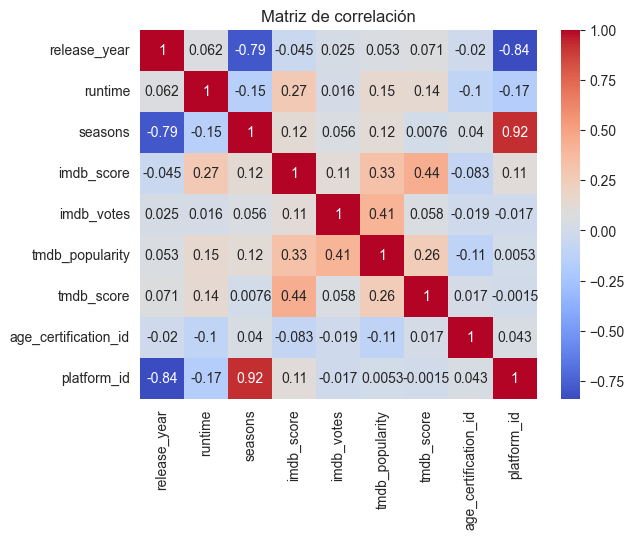

In [91]:
# Celda para graficar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

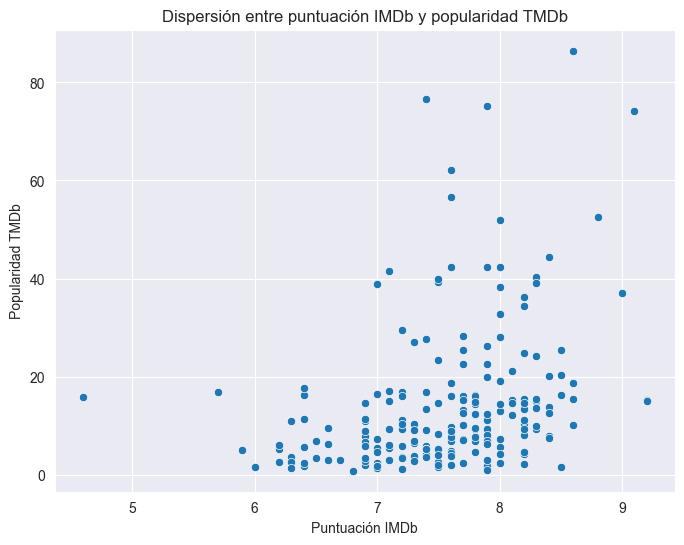

In [92]:
# Celda para graficar la dispersión entre la puntuación IMDb y la popularidad en TMDb
plt.figure(figsize=(8, 6))
sns.scatterplot(x='imdb_score', y='tmdb_popularity', data=data)
plt.title('Dispersión entre puntuación IMDb y popularidad TMDb')
plt.xlabel('Puntuación IMDb')
plt.ylabel('Popularidad TMDb')
plt.show()

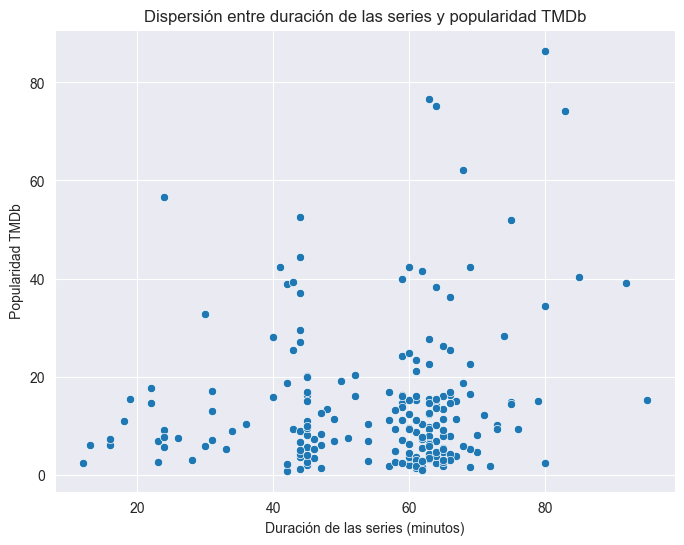

In [93]:
# Celda para graficar la dispersión entre la duración de las películas y su popularidad en TMDb
plt.figure(figsize=(8, 6))
sns.scatterplot(x='runtime', y='tmdb_popularity', data=data[data['type'] == 'SHOW'])
plt.title('Dispersión entre duración de las series y popularidad TMDb')
plt.xlabel('Duración de las series (minutos)')
plt.ylabel('Popularidad TMDb')
plt.show()

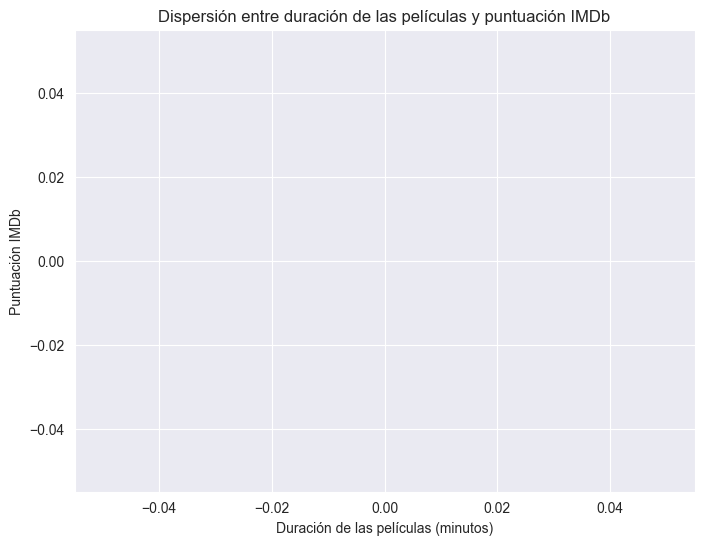

In [94]:
# Celda para graficar la dispersión entre la duración de las películas y su puntuación IMDb
plt.figure(figsize=(8, 6))
sns.scatterplot(x='runtime', y='imdb_score', data=data[data['type'] == 'MOVIE'])
plt.title('Dispersión entre duración de las películas y puntuación IMDb')
plt.xlabel('Duración de las películas (minutos)')
plt.ylabel('Puntuación IMDb')
plt.show()

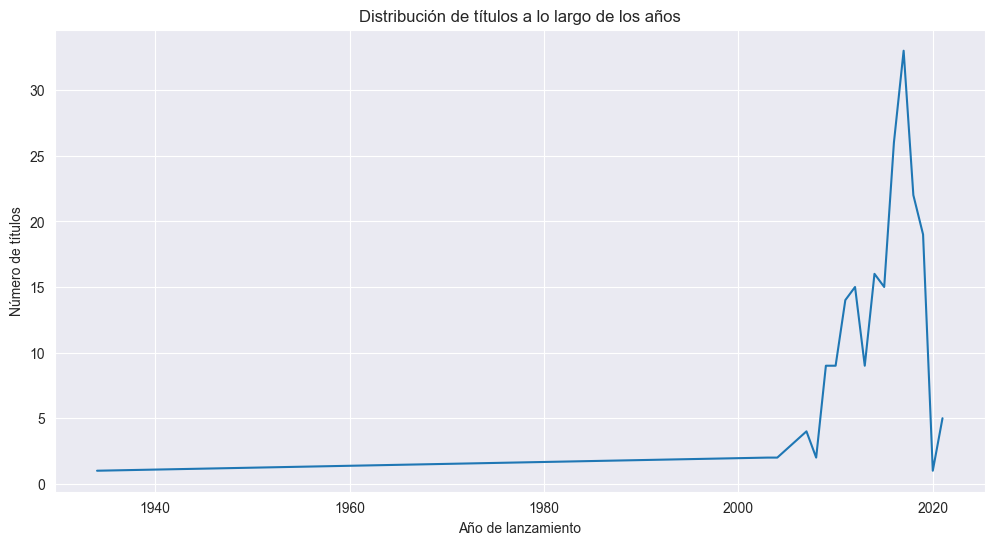

In [95]:
# Celda para graficar la distribución de títulos a lo largo de los años
plt.figure(figsize=(12, 6))
titles_per_year = data.groupby('release_year').size()
titles_per_year.plot(kind='line')
plt.title('Distribución de títulos a lo largo de los años')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de títulos')
plt.show()

## Análisis de décadas


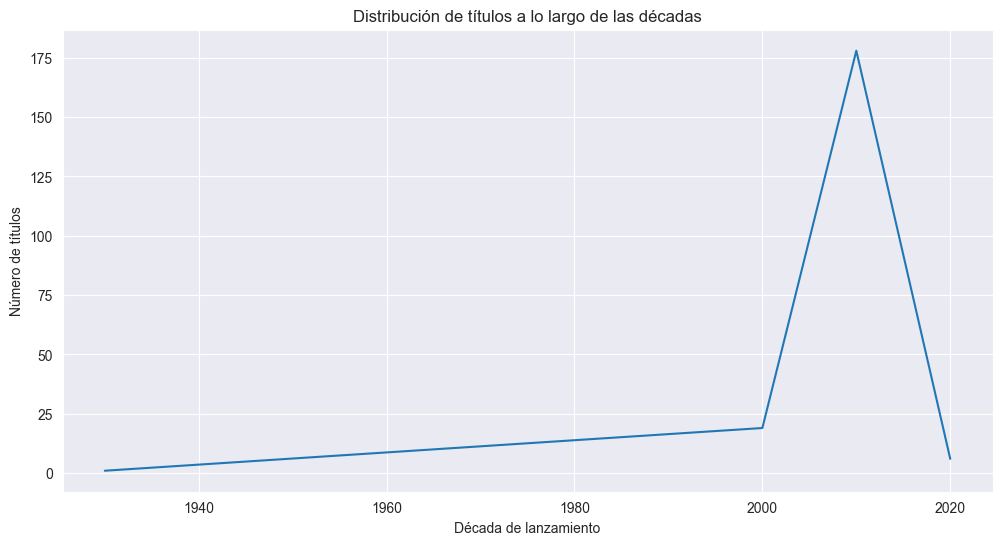

In [96]:
plt.figure(figsize=(12, 6))
data['release_decade'] = data['release_year'] // 10 * 10
titles_per_decade = data.groupby('release_decade').size()
titles_per_decade.plot(kind='line')
plt.title('Distribución de títulos a lo largo de las décadas')
plt.xlabel('Década de lanzamiento')
plt.ylabel('Número de títulos')
plt.show()

In [97]:
genre_query = """
SELECT
    t.imdb_score,
    t.tmdb_popularity,
    g.name AS genre_name
FROM
    titles t
JOIN
    titlegenres tg ON t.id = tg.title_id
JOIN
    genres g ON tg.genre_id = g.id;
"""
genre_data = pd.read_sql(genre_query, get_db_engine())
genre_data

,imdb_score,tmdb_popularity,genre_name
0,NaN,4.729,reality
1,7.5,10.413,fantasy
2,7.5,10.413,scifi
3,7.5,10.413,romance
4,7.5,10.413,drama
...,...,...,...
5143,6.0,1.280,romance
5144,5.7,1.010,western
5145,5.7,1.010,action
5146,5.7,1.010,crime


<Figure size 1200x600 with 0 Axes>

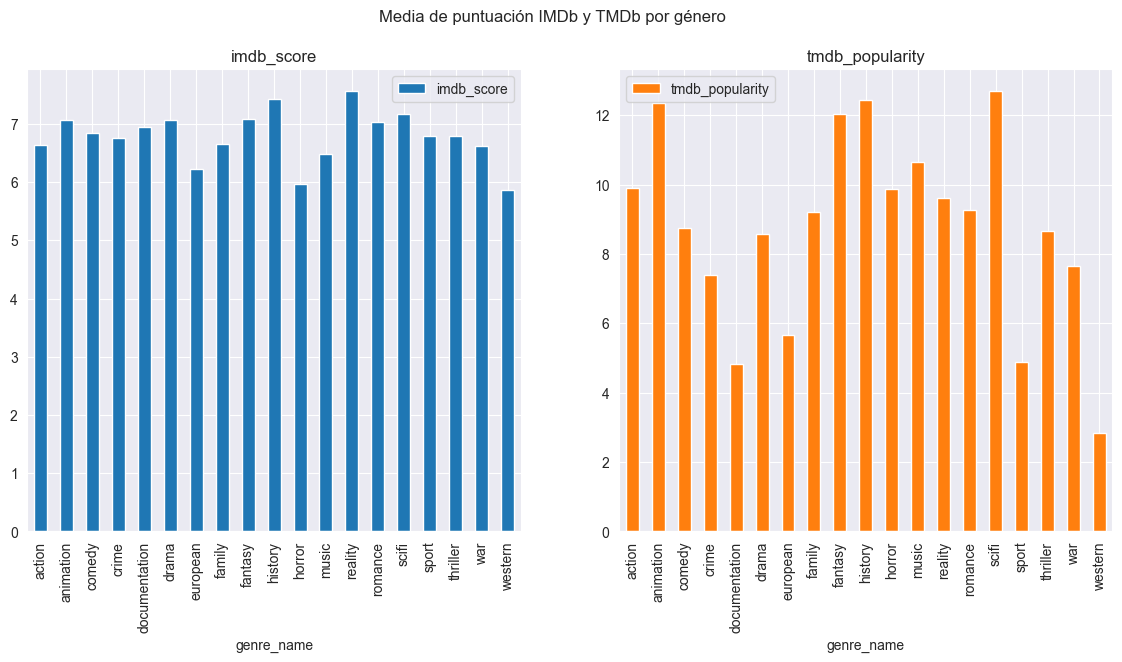

In [98]:
genre_avg_scores = genre_data.groupby('genre_name').agg({
    'imdb_score': 'mean',
    'tmdb_popularity': 'mean'
})

# Plota la media de puntuaciones por género
plt.figure(figsize=(12, 6))
genre_avg_scores.plot(kind='bar', subplots=True, layout=(1, 2), figsize=(14, 6), title='Media de puntuación IMDb y TMDb por género')
plt.show()